In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# split the data into independent and dependent variable

In [11]:
X = df.drop('math_score', axis=1)
y = df['math_score']
X.shape, y.shape

((1000, 7), (1000,))

In [12]:
# applying feature engineering and transformation which is 3 types

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [17]:
numerical_features=X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns




num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hotencoder', OneHotEncoder(handle_unknown='ignore')),
        ('scaler', StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('numerical_pipeline', num_pipeline, numerical_features),
        ('categorical_pipeline', cat_pipeline, categorical_features)
    ]
)

In [18]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['reading_score', 'writing_score'], dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hotencoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object'))])

In [20]:
X=preprocessor.fit_transform(X)
X

array([[ 0.19399858,  0.39149181,  2.00129726, ...,  2.08980597,
         0.        ,  2.08588794],
       [ 1.42747598,  1.31326868,  2.00129726, ...,  2.08980597,
         2.08588794,  0.        ],
       [ 1.77010859,  1.64247471,  2.00129726, ...,  2.08980597,
         0.        ,  2.08588794],
       ...,
       [ 0.12547206, -0.20107904,  2.00129726, ...,  0.        ,
         2.08588794,  0.        ],
       [ 0.60515772,  0.58901542,  2.00129726, ...,  2.08980597,
         2.08588794,  0.        ],
       [ 1.15336989,  1.18158627,  2.00129726, ...,  0.        ,
         0.        ,  2.08588794]])

In [21]:
# evaluate metric for model training

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
def evaluate_metrics(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, mse, rmse, r2_square

In [24]:
# intalling libary for model training

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import(
AdaBoostRegressor,
RandomForestRegressor,
GradientBoostingRegressor
)
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor


In [26]:
# split the data into train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [28]:
# inilliaze the model

In [29]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regressor": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random forest regressor": RandomForestRegressor(),
    "support vector machine": SVR(),
    "Adaboosting Regressor": AdaBoostRegressor(),
    "Gradient Decent Regressor": GradientBoostingRegressor(),
    "catboosting regressor": CatBoostRegressor(),
    "xgboosting regressor": XGBRFRegressor()
}

In [35]:
model_list = []
r2_list_train = []
r2_list_test = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # prediction with training and testing dataset
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate the model with training and testing dataset
    y_train_mae, y_train_mse, y_train_rmse, y_train_r2 = evaluate_metrics(y_train, y_train_pred)
    y_test_mae, y_test_mse, y_test_rmse, y_test_r2 = evaluate_metrics(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("="*80)
    print(f"Model Name: {model} ")


    print("model performance with training dataset")
    print("- MAE: {:.4f}".format(y_train_mae))
    print("- MSE: {:.4f}".format(y_train_mse))
    print("- RMSE: {:.4f}".format(y_train_rmse))
    print("- R2: {:.4f}".format(y_train_r2))

    print("- Model performance with testing dataset")
    print("- MAE: {:.4f}".format(y_test_mae))
    print("- MAE: {:.4f}".format(y_test_mse))
    print("- MAE: {:.4f}".format(y_test_rmse))
    print("- MAE: {:.4f}".format(y_test_r2))
    
    r2_list_test.append(y_test_r2)
    r2_list_train.append(y_train_r2)
    
    
    print("="*35)
    print("\n")

Decision Tree
Model Name: DecisionTreeRegressor() 
model performance with training dataset
- MAE: 0.0187
- MSE: 0.0781
- RMSE: 0.2795
- R2: 0.9997
- Model performance with testing dataset
- MAE: 6.1800
- MAE: 60.9000
- MAE: 7.8038
- MAE: 0.7497


Linear Regressor
Model Name: LinearRegression() 
model performance with training dataset
- MAE: 4.2745
- MSE: 28.6240
- RMSE: 5.3501
- R2: 0.8730
- Model performance with testing dataset
- MAE: 4.2203
- MAE: 29.0047
- MAE: 5.3856
- MAE: 0.8808


Ridge
Model Name: Ridge() 
model performance with training dataset
- MAE: 4.2650
- MSE: 28.3366
- RMSE: 5.3232
- R2: 0.8743
- Model performance with testing dataset
- MAE: 4.2126
- MAE: 29.0623
- MAE: 5.3909
- MAE: 0.8806


Lasso
Model Name: Lasso() 
model performance with training dataset
- MAE: 4.6908
- MSE: 34.8489
- RMSE: 5.9033
- R2: 0.8454
- Model performance with testing dataset
- MAE: 4.6308
- MAE: 34.9621
- MAE: 5.9129
- MAE: 0.8563


Random forest regressor
Model Name: RandomForestRegressor()

In [38]:
pd.DataFrame(list(zip(model_list,r2_list_test,r2_list_train)),columns=['Model Name', 'r2 score test', 'r2 score train']).sort_values(by=['r2 score test'],ascending=False)

,Model Name,r2 score test,r2 score train
1,Linear Regressor,0.880805,0.873035
2,Ridge,0.880568,0.874310
7,Gradient Decent Regressor,0.872128,0.905040
9,xgboosting regressor,0.866120,0.901613
3,Lasso,0.856323,0.845424
8,catboosting regressor,0.851632,0.958936
4,Random forest regressor,0.849251,0.976781
6,Adaboosting Regressor,0.846059,0.852359
0,Decision Tree,0.749731,0.999653
5,support vector machine,0.687200,0.755776


In [39]:
# applying hyperparameter using gridsearch cv

In [40]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid= {
    "Decision Tree": {'max_features': [None,3,5]},
    "Linear Regressor": {},
    "Ridge": {'alpha': [0.1,1,10]},
    "Lasso": {'alpha': [0.1,1,10]},
    "Random forest Regressor":{'n_estimators':[3,5,7]},
    "Adaboosting Regrssor": {'n_esmtimators': [50,100,300]},
    'Gradient Decent Regressor': {'n_estimators': [50,100,200],'max_depth':[5,7]},
    "catboosting regressor": {'iterations':[1,10,100]},
    "xgboosting regressor": {'n_estimators':[50,100,300]},
    "support vector machine": {}
}

In [91]:
best_models = {}
r2_list_grid_train = []
r2_list_grid_test = []

for model_name, model in models.items():
    if model_name in param_grid:
        search_grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='r2')
        search_grid.fit(X_train, y_train)
        best_models[model_name] = search_grid.best_estimator_
        print(f"Best parameter: {model_name} : {search_grid.best_params_}")
    else:
        best_models[model_name] = model

    best_models[model_name].fit(X_train, y_train)


    # prediction with training and testing dataset
    y_train_grid_pred = best_models[model_name].predict(X_train)
    y_test_grid_pred = best_models[model_name].predict(X_test)
    
    # Evaluate the model with training and testing 
    y_train_grid_mae, y_train_grid_mse, y_train_grid_rmse, y_train_grid_r2 = evaluate_metrics(y_train, y_train_grid_pred)
    y_test_grid_mae, y_test_grid_mse, y_test_grid_rmse, y_test_grid_r2 = evaluate_metrics(y_test, y_test_grid_pred)


    print("="*80)
    print(f"Model Name: {best_models[model_name]} ")
    
    
    print("model performace with training dataset")
    print("- MAE: {:.4f}".format(y_train_grid_mae))
    print("- MSE: {:.4f}".format(y_train_grid_mse))
    print("- RMSE: {:.4f}".format(y_train_grid_rmse))
    print("- R2: {:.4f}".format(y_train_grid_r2))
    
    print("model performace with testing dataset")
    print("- MAE: {:.4f}".format(y_test_grid_mae))
    print("- MSE: {:.4f}".format(y_test_grid_mse))
    print("- RMSE: {:.4f}".format(y_test_grid_rmse))
    print("- R2: {:.4f}".format(y_test_grid_r2))
    
    
    r2_list_grid_test.append(y_train_grid_r2)
    r2_list_grid_train.append(y_test_grid_r2)
    
    
    print("="*35)
    print("\n")


   

Best parameter: Decision Tree : {'max_features': None}
Model Name: DecisionTreeRegressor() 
model performace with training dataset
- MAE: 0.0187
- MSE: 0.0781
- RMSE: 0.2795
- R2: 0.9997
model performace with testing dataset
- MAE: 6.5950
- MSE: 67.3950
- RMSE: 8.2094
- R2: 0.7230


Best parameter: Linear Regressor : {}
Model Name: LinearRegression() 
model performace with training dataset
- MAE: 4.2745
- MSE: 28.6240
- RMSE: 5.3501
- R2: 0.8730
model performace with testing dataset
- MAE: 4.2203
- MSE: 29.0047
- RMSE: 5.3856
- R2: 0.8808


Best parameter: Ridge : {'alpha': 0.1}
Model Name: Ridge(alpha=0.1) 
model performace with training dataset
- MAE: 4.2665
- MSE: 28.3349
- RMSE: 5.3231
- R2: 0.8743
model performace with testing dataset
- MAE: 4.2145
- MSE: 29.0915
- RMSE: 5.3937
- R2: 0.8804


Best parameter: Lasso : {'alpha': 0.1}
Model Name: Lasso(alpha=0.1) 
model performace with training dataset
- MAE: 4.2764
- MSE: 28.4994
- RMSE: 5.3385
- R2: 0.8736
model performace with test

In [92]:
pd.DataFrame(list(zip(best_models.keys(),r2_list_grid_test, r2_list_grid_train)),columns=['best model name','r2 score grid test','r2 score grid train']).sort_values(by=['r2 score grid train'],ascending=False)

,best model name,r2 score grid test,r2 score grid train
3,Lasso,0.873588,0.882087
1,Linear Regressor,0.873035,0.880805
2,Ridge,0.874317,0.880448
7,Gradient Decent Regressor,0.933842,0.870915
9,xgboosting regressor,0.901028,0.866006
4,Random forest regressor,0.976551,0.853980
6,Adaboosting Regressor,0.848671,0.848039
8,catboosting regressor,0.942285,0.845898
0,Decision Tree,0.999653,0.723040
5,support vector machine,0.755776,0.687200


In [93]:
# after applying hyperparameter best model found lasso

In [96]:
lasso_grid = {
    'alpha': [0.1,1,10]
}

lasso_model = Lasso()
lasso_param = GridSearchCV(lasso_model,lasso_grid, cv=5, scoring='r2')



In [98]:
lasso_fit=lasso_param.fit(X_train, y_train)

In [99]:
lasso_fit

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10]},
             scoring='r2')

In [106]:
lasso_pred=lasso_fit.predict(X_test)
lasso_score = r2_score(y_test, lasso_pred)*100
print(f"Model score is: {lasso_score}")

Model score is: 88.2086921452269


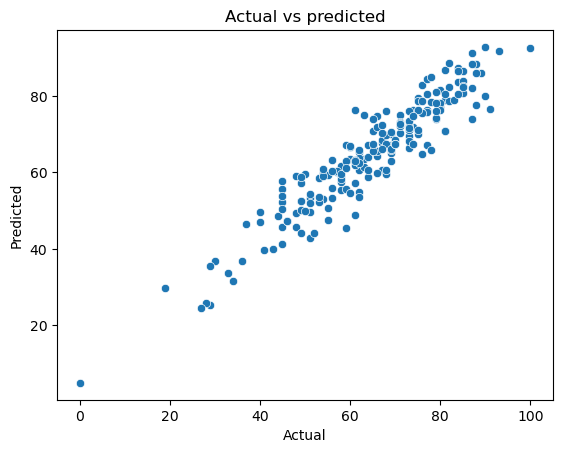

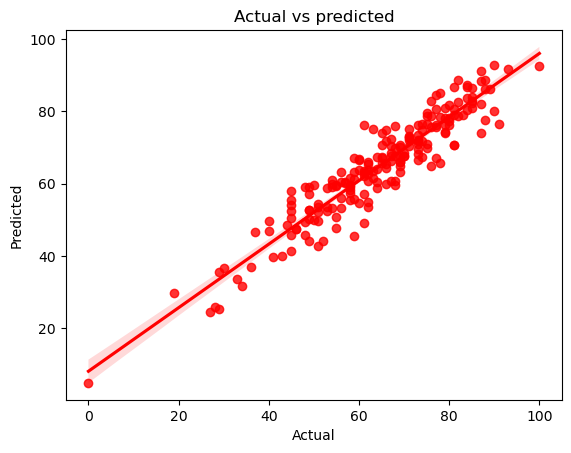

In [110]:
# actual vs predicted

sns.scatterplot(x=y_test, y=lasso_pred)
plt.title("Actual vs predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

print("===================================================================================================")

# actual vs predicted

sns.regplot(x=y_test, y=lasso_pred,color='r')
plt.title("Actual vs predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


C:\Users\ramn\AppData\Local\Temp\ipykernel_20156\3498284655.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, kde=True)
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


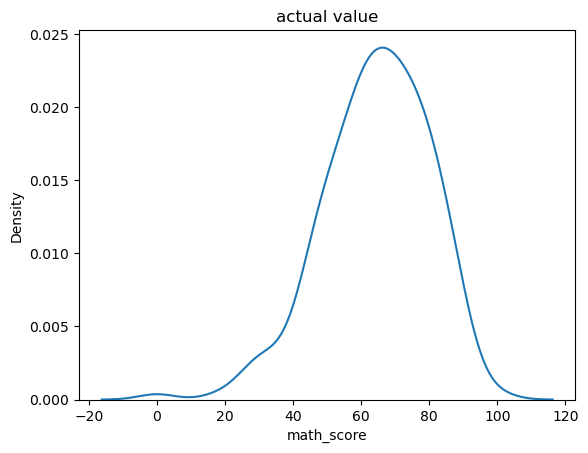

C:\Users\ramn\AppData\Local\Temp\ipykernel_20156\3498284655.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lasso_pred, hist=False,kde=True, color='g')
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


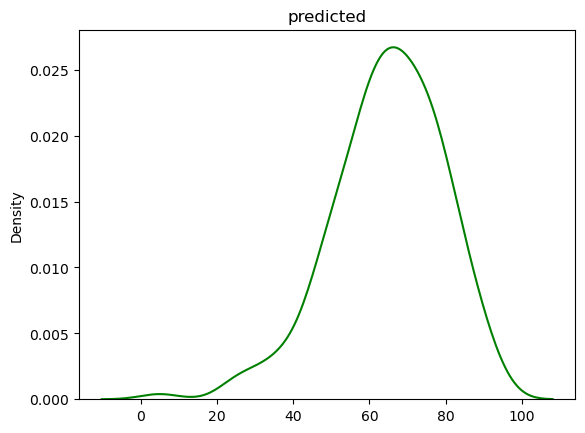

In [112]:
sns.distplot(y_test, hist=False, kde=True)
plt.title("actual value")
plt.show()

sns.distplot(lasso_pred, hist=False,kde=True, color='g')
plt.title('predicted')
plt.show()

In [113]:
# Difference between predicted and actual

In [114]:
pd.DataFrame({
    'Actual': y_test, "predicted": lasso_pred, "Difference": y_test - lasso_pred
})

,Actual,predicted,Difference
521,91,76.487415,14.512585
737,53,58.645233,-5.645233
740,80,77.226523,2.773477
660,74,76.426131,-2.426131
411,84,87.211346,-3.211346
...,...,...,...
408,52,44.127513,7.872487
332,62,62.519146,-0.519146
208,74,67.470853,6.529147
613,65,67.329326,-2.329326
